In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../data/The_Cancer_data_1500_V2.csv')
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [3]:
data.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

In [4]:
## print shape of dataset with rows and columns
print(data.shape)

(1500, 9)


In [5]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [6]:
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [7]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset
df = pd.read_csv("../data/The_Cancer_data_1500_V2.csv")

# Generate report
profile = ProfileReport(df, title="Cancer Prediction Data Report", explorative=True)
profile.to_file("cancer_report.html")

c:\Cancer Prediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 51.62it/s]


In [8]:
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')
Index([], dtype='object')


In [9]:
data['AgeCat'] = pd.cut(data['Age'], bins=[-np.inf, 18, 30, 45, np.inf], labels=['child', 'young', 'middle-aged', 'aged'])
data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,AgeCat
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,aged
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,aged
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,aged
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,middle-aged
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,aged
...,...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1,aged
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1,middle-aged
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1,aged
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1,aged


In [10]:
print(data.iloc[56])

Age                        28
Gender                      1
BMI                 16.735596
Smoking                     0
GeneticRisk                 1
PhysicalActivity     1.266371
AlcoholIntake        1.600906
CancerHistory               0
Diagnosis                   0
AgeCat                  young
Name: 56, dtype: object


In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=7, stratify=data['AgeCat'])

In [12]:
print(train['AgeCat'].value_counts(normalize=True) * 100)
print(test['AgeCat'].value_counts(normalize=True) * 100)

AgeCat
aged           58.250000
middle-aged    23.916667
young          17.833333
child           0.000000
Name: proportion, dtype: float64
AgeCat
aged           58.333333
middle-aged    24.000000
young          17.666667
child           0.000000
Name: proportion, dtype: float64


In [13]:
train_set, val_set = train_test_split(train, test_size=0.2, random_state=7, stratify=train['AgeCat'])

train_set.drop(columns=['AgeCat'], axis=1, inplace= True)
val_set.drop(columns=['AgeCat'], axis=1, inplace=True)

In [14]:
X_train = train_set.drop(columns=['Diagnosis'])
y_train = train_set['Diagnosis']

X_val = val_set.drop(columns=['Diagnosis'])
y_val = val_set['Diagnosis']

In [15]:
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns

In [16]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
#X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

X_val[num_cols] = num_imputer.transform(X_val[num_cols])
#X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])

In [17]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Age, Gender, BMI, Smoking, GeneticRisk, PhysicalActivity, AlcoholIntake, CancerHistory, Diagnosis, AgeCat]
Index: []


In [18]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

scaler = StandardScaler()
encoder = OrdinalEncoder()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
log_reg.score(X_val, y_val)

0.85

In [21]:
pred = log_reg.predict(X_val)

In [107]:
# Build a model using RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))

0.9375


In [63]:
# Build a model using GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(gb.score(X_val, y_val))

0.925


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_val)

# Evaluate performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       154
           1       0.93      0.90      0.91        86

    accuracy                           0.94       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.94      0.94       240



# **Model Comparison and Selection**

**After comparing the performance of Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier, we observed that the Random Forest Classifier yielded the highest score. Therefore, the Random Forest Classifier is selected as the best model.**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
data = pd.read_csv('../data/The_Cancer_data_1500_V2.csv')


C:\Users\88017\AppData\Local\Temp\ipykernel_11136\1551373672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette='Set2')


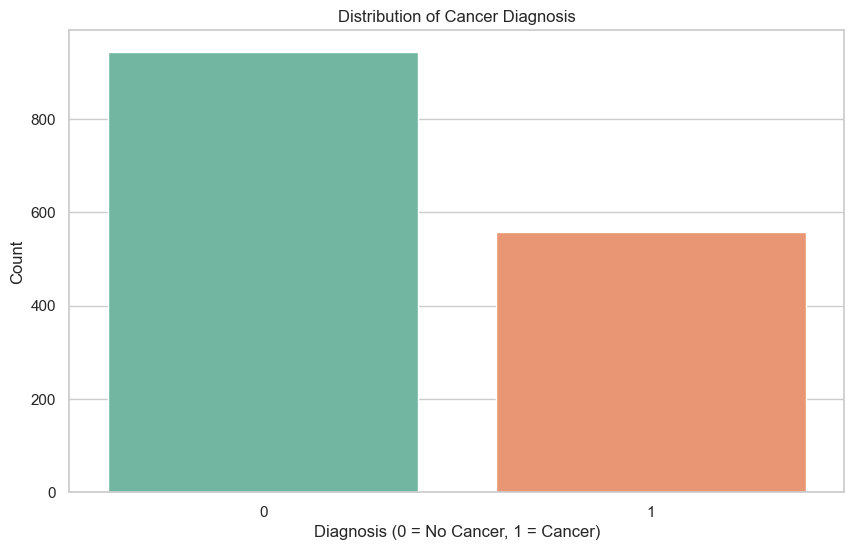

In [84]:
sns.countplot(x='Diagnosis', data=data, palette='Set2')
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (0 = No Cancer, 1 = Cancer)')
plt.ylabel('Count')
plt.show()


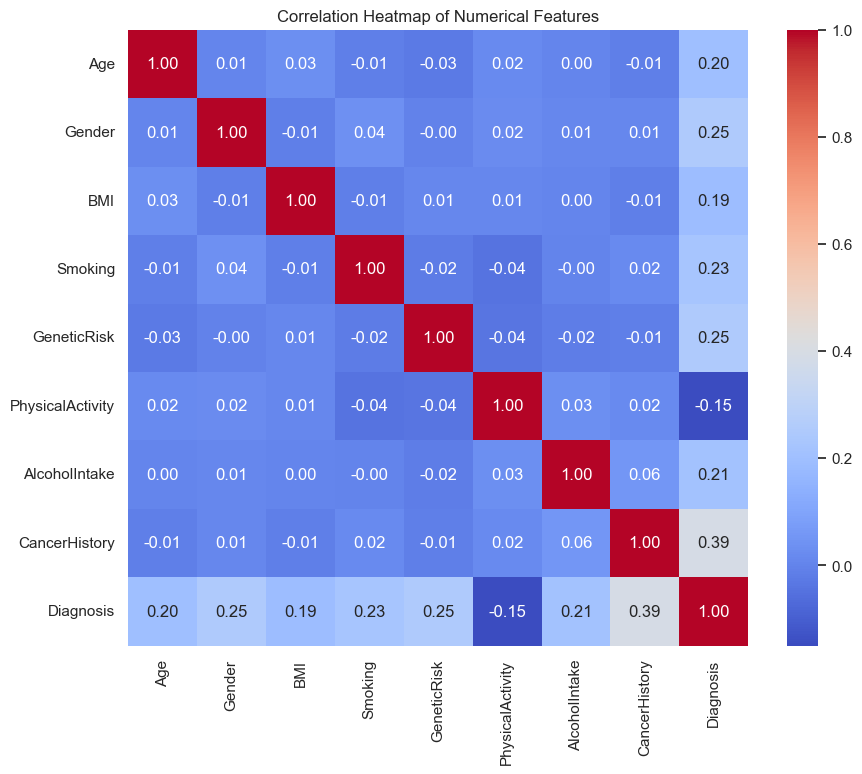

In [85]:
num_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


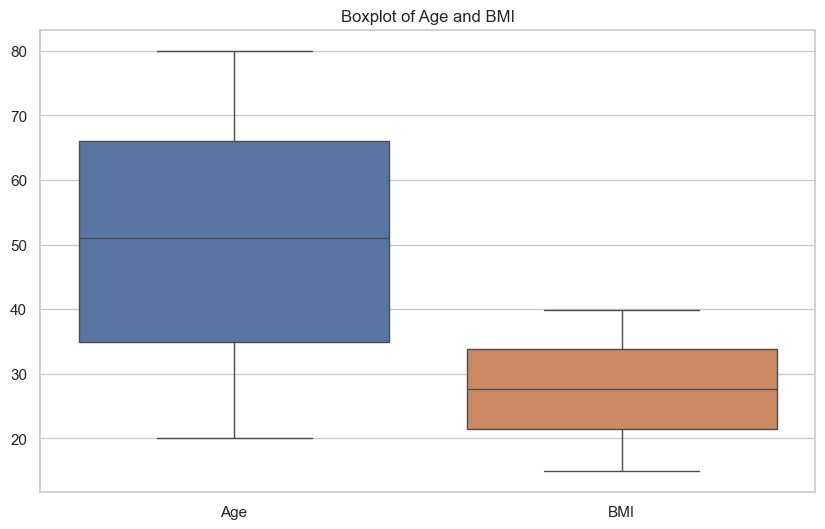

In [86]:
sns.boxplot(data=data[['Age', 'BMI']])
plt.title('Boxplot of Age and BMI')
plt.show()


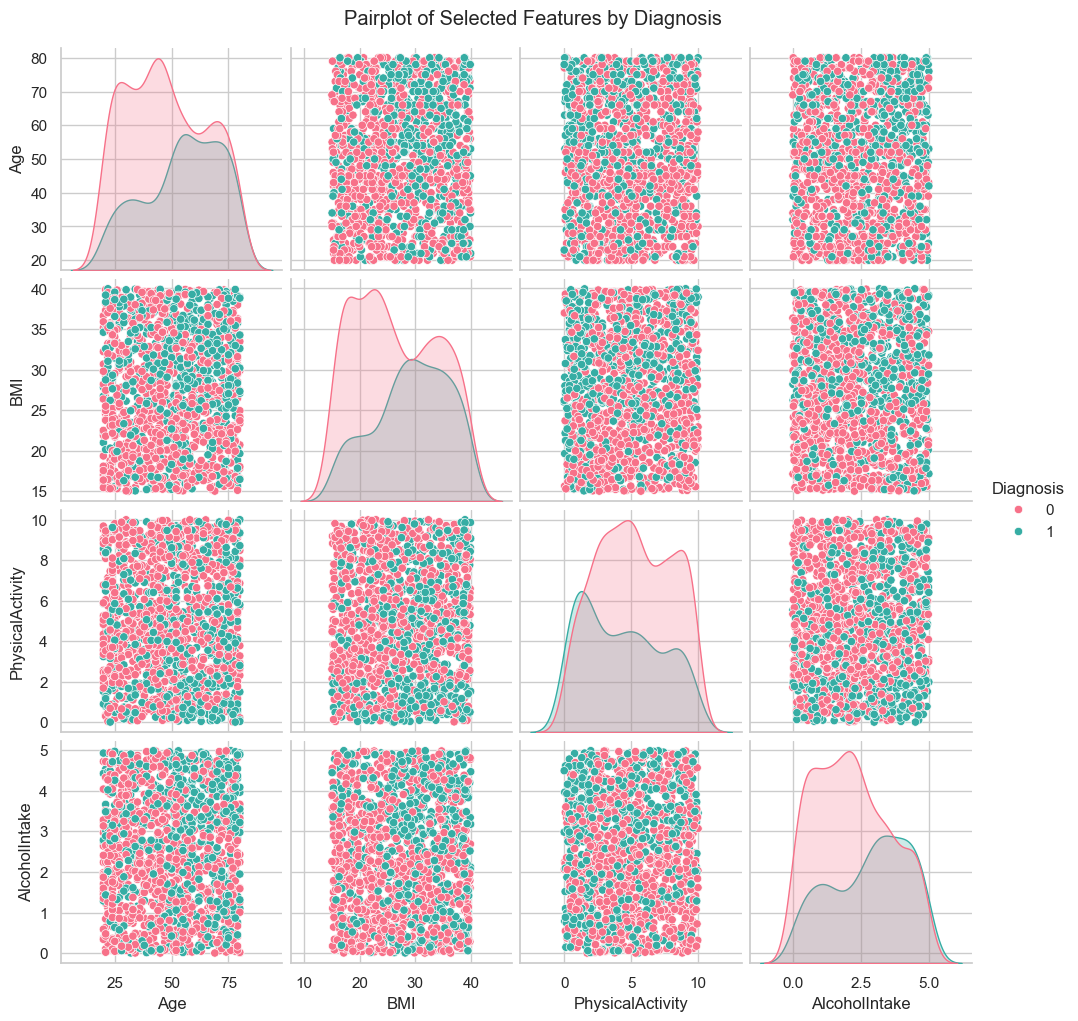

In [87]:
sns.pairplot(data, vars=['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake'],
             hue='Diagnosis', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()


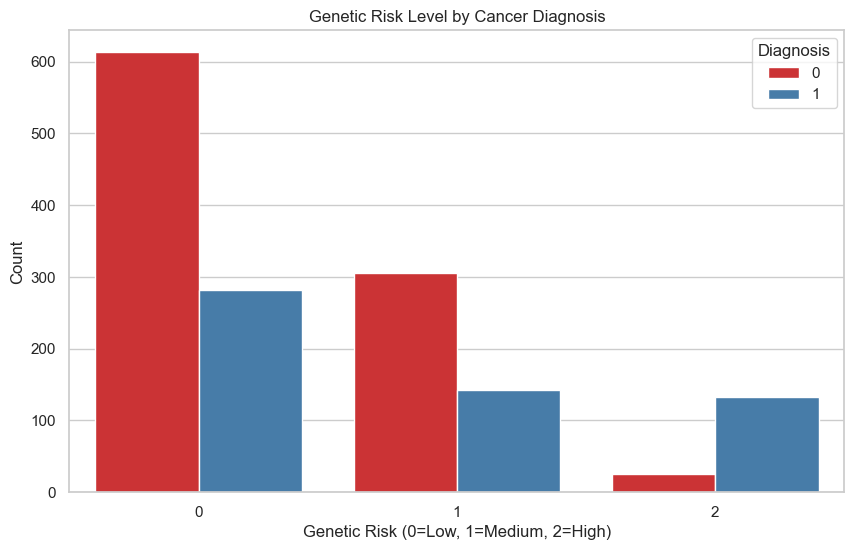

In [93]:
sns.countplot(x='GeneticRisk', hue='Diagnosis', data=data, palette='Set1')
plt.title('Genetic Risk Level by Cancer Diagnosis')
plt.xlabel('Genetic Risk (0=Low, 1=Medium, 2=High)')
plt.ylabel('Count')
plt.show()


C:\Users\88017\AppData\Local\Temp\ipykernel_11136\2540977369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


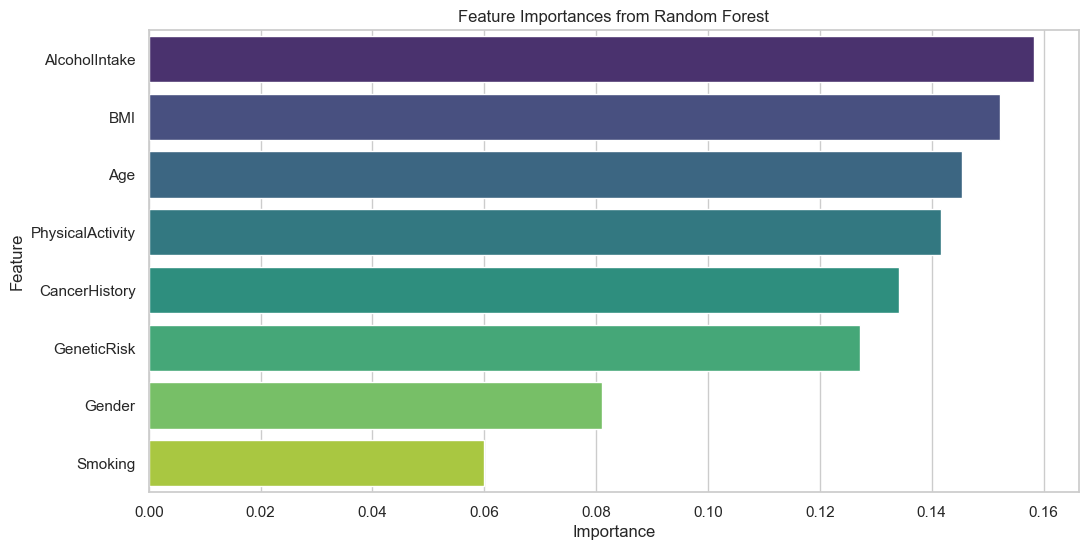

In [89]:
# Only run this if you've already trained `rf`
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


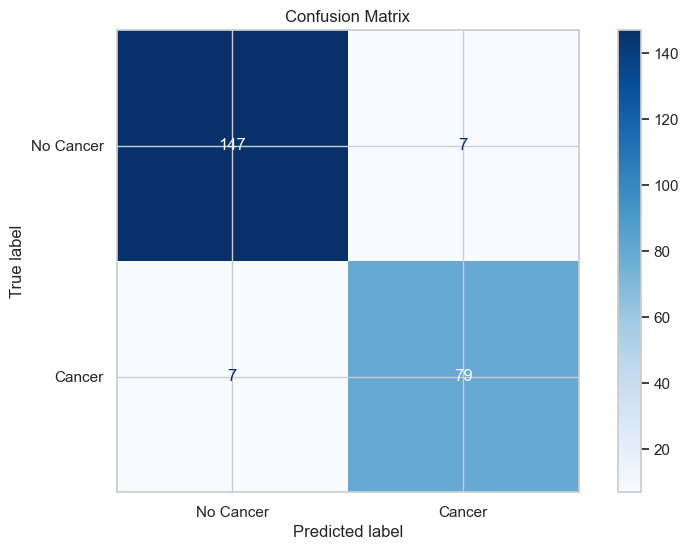

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
